# Asignment 7

## 1

### A

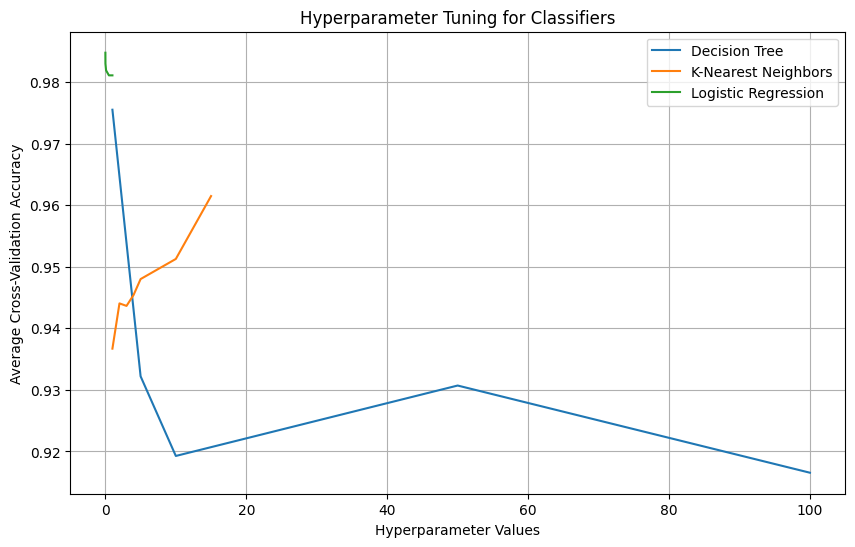

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

filepath = "../Data/train_office.csv"

# Load the data
data = pd.read_csv(filepath)

# Drop the 'date' column from features
X = data.drop(['Occupancy', 'date'], axis=1)
y = data['Occupancy']

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Define hyperparameter grids
param_grids = {
    'Decision Tree': {'max_depth': [1, 5, 10, 50, 100]},
    'K-Nearest Neighbors': {'n_neighbors': [1, 2, 3, 4, 5, 10, 15]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 0.5, 1]}
}

# Perform 5-fold cross-validation and calculate average accuracy
avg_accuracies = {}

for clf_name, clf in classifiers.items():
    param_grid = param_grids[clf_name]
    scores = []
    
    for param_name, param_values in param_grid.items():
        for val in param_values:
            params = {param_name: val}
            param_scores = cross_val_score(clf.set_params(**params), X, y, cv=5)
            scores.append(np.mean(param_scores))
    
    avg_accuracies[clf_name] = scores

# Plotting
plt.figure(figsize=(10, 6))

for clf_name, scores in avg_accuracies.items():
    param_values = list(param_grids[clf_name].values())[0]
    plt.plot(param_values, scores, label=clf_name)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Average Cross-Validation Accuracy')
plt.legend()
plt.title('Hyperparameter Tuning for Classifiers')
plt.grid(True)
plt.show()

### B

For K-Nearest Neigbors, I chose 15,
For Decision Tree, I chose 1
For Logistic Regression, I chose .001

### C

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Load the data
data = pd.read_csv("../Data/train_office.csv")

# Drop the 'date' column from features
X = data.drop(['Occupancy', 'date'], axis=1)
y = data['Occupancy']

# Train Decision Tree with chosen hyperparameter (max_depth=1)
dt_model = DecisionTreeClassifier(max_depth=1)
dt_model.fit(X, y)

# Train K-Nearest Neighbors with chosen hyperparameter (n_neighbors=15)
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X, y)

# Train Logistic Regression with chosen hyperparameter (C=0.001)
lr_model = LogisticRegression(C=0.001)
lr_model.fit(X, y)

LogisticRegression(C=0.001)

### D

Confusion Matrix for Decision Tree (DT):
 [[641   6]
 [  1 149]]

Confusion Matrix for K-Nearest Neighbors (KNN):
 [[641   6]
 [  1 149]]

Confusion Matrix for Logistic Regression (LR):
 [[641   6]
 [  0 150]]


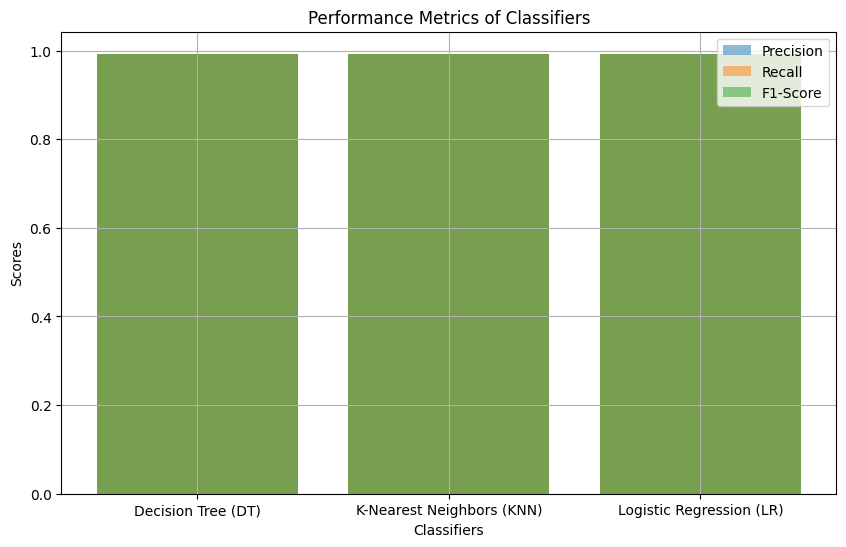

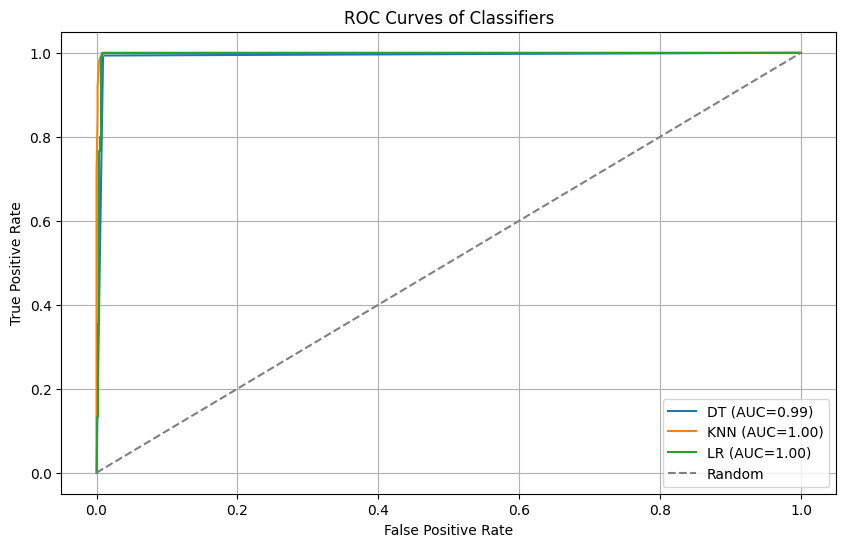

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the test data
test_data = pd.read_csv("../Data/test_office.csv")
X_test = test_data.drop(['Occupancy', 'date'], axis=1)
y_test = test_data['Occupancy']

# Use the trained models to predict labels for test samples
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# i. Print out the confusion matrices
confusion_dt = confusion_matrix(y_test, y_pred_dt)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix for Decision Tree (DT):\n", confusion_dt)
print("\nConfusion Matrix for K-Nearest Neighbors (KNN):\n", confusion_knn)
print("\nConfusion Matrix for Logistic Regression (LR):\n", confusion_lr)

# ii. Calculate precision, recall, and F1-score and draw a bar plot
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

precisions = [report_dt['weighted avg']['precision'], report_knn['weighted avg']['precision'], report_lr['weighted avg']['precision']]
recalls = [report_dt['weighted avg']['recall'], report_knn['weighted avg']['recall'], report_lr['weighted avg']['recall']]
f1_scores = [report_dt['weighted avg']['f1-score'], report_knn['weighted avg']['f1-score'], report_lr['weighted avg']['f1-score']]

classifiers = ['Decision Tree (DT)', 'K-Nearest Neighbors (KNN)', 'Logistic Regression (LR)']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, precisions, alpha=0.5, label='Precision')
plt.bar(classifiers, recalls, alpha=0.5, label='Recall')
plt.bar(classifiers, f1_scores, alpha=0.5, label='F1-Score')
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance Metrics of Classifiers')
plt.legend()
plt.grid(True)
plt.show()

# iii. Draw ROC curves and calculate AUCs
prob_dt = dt_model.predict_proba(X_test)[:, 1]
prob_knn = knn_model.predict_proba(X_test)[:, 1]
prob_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, prob_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, prob_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_lr)

auc_dt = roc_auc_score(y_test, prob_dt)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_lr = roc_auc_score(y_test, prob_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC={auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Classifiers')
plt.legend()
plt.grid(True)
plt.show()